# OPEN QUESTION

## Investigating metadata using logistic regression

For the open question, we decided to look at the patient and lesion features found in the metadata.csv file, such as the patiens smoking and drinking habits, and whether the lesion itched or hurt, to see whether this informations can be used to predict a diagnosis for the lesion

### Imports

In [17]:
import pandas as pd
#import missingno as msno
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedShuffleSplit, cross_validate
from sklearn.feature_selection import RFE, RFECV
import os
from sklearn.metrics import accuracy_score, recall_score, precision_score, roc_auc_score, make_scorer 

### Data Preperation

In [2]:
# Read raw data
raw_data = pd.read_csv('..' + os.sep + 'data' + os.sep + 'meta_data' + os.sep + 'raw' + os.sep + 'metadata.csv')
print(raw_data.shape)
raw_data.head(20)

(2298, 26)


,patient_id,lesion_id,smoke,drink,background_father,background_mother,age,pesticide,gender,skin_cancer_history,...,diameter_2,diagnostic,itch,grew,hurt,changed,bleed,elevation,img_id,biopsed
0,PAT_1516,1765,NaN,NaN,NaN,NaN,8,NaN,NaN,NaN,...,NaN,NEV,False,False,False,False,False,False,PAT_1516_1765_530.png,False
1,PAT_46,881,False,False,POMERANIA,POMERANIA,55,False,FEMALE,True,...,5.0,BCC,True,True,False,True,True,True,PAT_46_881_939.png,True
2,PAT_1545,1867,NaN,NaN,NaN,NaN,77,NaN,NaN,NaN,...,NaN,ACK,True,False,False,False,False,False,PAT_1545_1867_547.png,False
3,PAT_1989,4061,NaN,NaN,NaN,NaN,75,NaN,NaN,NaN,...,NaN,ACK,True,False,False,False,False,False,PAT_1989_4061_934.png,False
4,PAT_684,1302,False,True,POMERANIA,POMERANIA,79,False,MALE,True,...,5.0,BCC,True,True,False,False,True,True,PAT_684_1302_588.png,True
5,PAT_1549,1882,NaN,NaN,NaN,NaN,53,NaN,NaN,NaN,...,NaN,SEK,True,False,False,False,False,True,PAT_1549_1882_230.png,False
6,PAT_778,1471,False,True,GERMANY,ITALY,52,False,FEMALE,False,...,10.0,BCC,False,True,False,True,True,True,PAT_778_1471_835.png,True
7,PAT_117,179,False,False,POMERANIA,POMERANIA,74,True,FEMALE,False,...,10.0,BCC,True,True,True,False,True,True,PAT_117_179_983.png,True
8,PAT_1995,4080,NaN,NaN,NaN,NaN,68,NaN,NaN,NaN,...,NaN,ACK,True,False,False,True,False,False,PAT_1995_4080_695.png,False
9,PAT_705,4015,False,True,GERMANY,GERMANY,58,True,FEMALE,True,...,7.0,ACK,False,True,False,False,False,False,PAT_705_4015_413.png,False


Removing unnecessary columns: 

In [3]:
data = raw_data.drop(["img_id", "biopsed"], axis="columns")

print(data.shape)
data.head(20)

(2298, 24)


,patient_id,lesion_id,smoke,drink,background_father,background_mother,age,pesticide,gender,skin_cancer_history,...,region,diameter_1,diameter_2,diagnostic,itch,grew,hurt,changed,bleed,elevation
0,PAT_1516,1765,NaN,NaN,NaN,NaN,8,NaN,NaN,NaN,...,ARM,NaN,NaN,NEV,False,False,False,False,False,False
1,PAT_46,881,False,False,POMERANIA,POMERANIA,55,False,FEMALE,True,...,NECK,6.0,5.0,BCC,True,True,False,True,True,True
2,PAT_1545,1867,NaN,NaN,NaN,NaN,77,NaN,NaN,NaN,...,FACE,NaN,NaN,ACK,True,False,False,False,False,False
3,PAT_1989,4061,NaN,NaN,NaN,NaN,75,NaN,NaN,NaN,...,HAND,NaN,NaN,ACK,True,False,False,False,False,False
4,PAT_684,1302,False,True,POMERANIA,POMERANIA,79,False,MALE,True,...,FOREARM,5.0,5.0,BCC,True,True,False,False,True,True
5,PAT_1549,1882,NaN,NaN,NaN,NaN,53,NaN,NaN,NaN,...,CHEST,NaN,NaN,SEK,True,False,False,False,False,True
6,PAT_778,1471,False,True,GERMANY,ITALY,52,False,FEMALE,False,...,FACE,15.0,10.0,BCC,False,True,False,True,True,True
7,PAT_117,179,False,False,POMERANIA,POMERANIA,74,True,FEMALE,False,...,FACE,15.0,10.0,BCC,True,True,True,False,True,True
8,PAT_1995,4080,NaN,NaN,NaN,NaN,68,NaN,NaN,NaN,...,FOREARM,NaN,NaN,ACK,True,False,False,True,False,False
9,PAT_705,4015,False,True,GERMANY,GERMANY,58,True,FEMALE,True,...,FOREARM,9.0,7.0,ACK,False,True,False,False,False,False


Grouping diagnoses into 0 (skin disease / healthy) or 1 (cancer / unhealthy), changing True to 1, False to 0, and "UNK" (unknown) to NA.

In [5]:
data.replace("True", 1, inplace=True)
data.replace("False", 0, inplace=True)
data.replace(True, 1, inplace=True)
data.replace(False, 0, inplace=True)
data.replace("UNK", float("NaN"), inplace=True)

for i, diagnose in enumerate(["ACK", "NEV", "SEK", "BCC", "MEL", "SCC"]):
    if i <= 2:
        data.replace(diagnose, 0, inplace=True)
    else:
        data.replace(diagnose, 1, inplace=True)

data.head(20)

,patient_id,lesion_id,smoke,drink,background_father,background_mother,age,pesticide,gender,skin_cancer_history,...,region,diameter_1,diameter_2,diagnostic,itch,grew,hurt,changed,bleed,elevation
0,PAT_1516,1765,NaN,NaN,NaN,NaN,8,NaN,NaN,NaN,...,ARM,NaN,NaN,0,0.0,0.0,0.0,0.0,0.0,0.0
1,PAT_46,881,0.0,0.0,POMERANIA,POMERANIA,55,0.0,FEMALE,1.0,...,NECK,6.0,5.0,1,1.0,1.0,0.0,1.0,1.0,1.0
2,PAT_1545,1867,NaN,NaN,NaN,NaN,77,NaN,NaN,NaN,...,FACE,NaN,NaN,0,1.0,0.0,0.0,0.0,0.0,0.0
3,PAT_1989,4061,NaN,NaN,NaN,NaN,75,NaN,NaN,NaN,...,HAND,NaN,NaN,0,1.0,0.0,0.0,0.0,0.0,0.0
4,PAT_684,1302,0.0,1.0,POMERANIA,POMERANIA,79,0.0,MALE,1.0,...,FOREARM,5.0,5.0,1,1.0,1.0,0.0,0.0,1.0,1.0
5,PAT_1549,1882,NaN,NaN,NaN,NaN,53,NaN,NaN,NaN,...,CHEST,NaN,NaN,0,1.0,0.0,0.0,0.0,0.0,1.0
6,PAT_778,1471,0.0,1.0,GERMANY,ITALY,52,0.0,FEMALE,0.0,...,FACE,15.0,10.0,1,0.0,1.0,0.0,1.0,1.0,1.0
7,PAT_117,179,0.0,0.0,POMERANIA,POMERANIA,74,1.0,FEMALE,0.0,...,FACE,15.0,10.0,1,1.0,1.0,1.0,0.0,1.0,1.0
8,PAT_1995,4080,NaN,NaN,NaN,NaN,68,NaN,NaN,NaN,...,FOREARM,NaN,NaN,0,1.0,0.0,0.0,1.0,0.0,0.0
9,PAT_705,4015,0.0,1.0,GERMANY,GERMANY,58,1.0,FEMALE,1.0,...,FOREARM,9.0,7.0,0,0.0,1.0,0.0,0.0,0.0,0.0


There are multiple occourances of the same lesion being present two or more times in the dataset with different pictures, often creating duplicate observations. We will remove any of these duplicate observations. Afterwards, we will remove the "patient_id" and "lesion_id" columns, as these are now unnesecary.

In [6]:
data.drop_duplicates(inplace=True, ignore_index=True)
data = data.drop(["patient_id", "lesion_id"], axis="columns")

print(data.shape)
data.head(20)

(1891, 22)


,smoke,drink,background_father,background_mother,age,pesticide,gender,skin_cancer_history,cancer_history,has_piped_water,...,region,diameter_1,diameter_2,diagnostic,itch,grew,hurt,changed,bleed,elevation
0,NaN,NaN,NaN,NaN,8,NaN,NaN,NaN,NaN,NaN,...,ARM,NaN,NaN,0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,POMERANIA,POMERANIA,55,0.0,FEMALE,1.0,1.0,1.0,...,NECK,6.0,5.0,1,1.0,1.0,0.0,1.0,1.0,1.0
2,NaN,NaN,NaN,NaN,77,NaN,NaN,NaN,NaN,NaN,...,FACE,NaN,NaN,0,1.0,0.0,0.0,0.0,0.0,0.0
3,NaN,NaN,NaN,NaN,75,NaN,NaN,NaN,NaN,NaN,...,HAND,NaN,NaN,0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.0,1.0,POMERANIA,POMERANIA,79,0.0,MALE,1.0,0.0,0.0,...,FOREARM,5.0,5.0,1,1.0,1.0,0.0,0.0,1.0,1.0
5,NaN,NaN,NaN,NaN,53,NaN,NaN,NaN,NaN,NaN,...,CHEST,NaN,NaN,0,1.0,0.0,0.0,0.0,0.0,1.0
6,0.0,1.0,GERMANY,ITALY,52,0.0,FEMALE,0.0,1.0,1.0,...,FACE,15.0,10.0,1,0.0,1.0,0.0,1.0,1.0,1.0
7,0.0,0.0,POMERANIA,POMERANIA,74,1.0,FEMALE,0.0,0.0,0.0,...,FACE,15.0,10.0,1,1.0,1.0,1.0,0.0,1.0,1.0
8,NaN,NaN,NaN,NaN,68,NaN,NaN,NaN,NaN,NaN,...,FOREARM,NaN,NaN,0,1.0,0.0,0.0,1.0,0.0,0.0
9,0.0,1.0,GERMANY,GERMANY,58,1.0,FEMALE,1.0,1.0,1.0,...,FOREARM,9.0,7.0,0,0.0,1.0,0.0,0.0,0.0,0.0


Checking for missing data:

In [15]:
#msno.bar(data)

As can be seen from the above bar plot, many of the predictor variables are missing substaintial amounts of data, however, it seems that the missing data points occour in the same observations. This can also be confirmed when looking at the dataset. Therefore, there are two reasonable ways to handle the missing data:

1. Remove the predictor variables with a lot of missing data and removing the few observations with missing data point that remain (roughly maintaining the size of the dataset).
2. Keeping all predictor variables but removing all observations with missing data points (reducing the size of the dataset substaintially)

We will create two models, one for each option, and see which one creates the best fit.

In [7]:
# Option 1
complete_cols = ["age", "itch", "hurt", "bleed", "elevation", "diagnostic"]
deep_data = data[complete_cols].dropna()
deep_unhealthy_perc = sum(deep_data["diagnostic"])/len(deep_data["diagnostic"]) * 100
print("Percentage of unhealthy lesions in deep data:", round(deep_unhealthy_perc, 2))

# Option 2
wide_data = data.dropna()
wide_unhealthy_perc = sum(wide_data["diagnostic"])/len(wide_data["diagnostic"]) * 100
print("Percentage of unhealthy lesions in deep data:", round(wide_unhealthy_perc, 2))

Percentage of unhealthy lesions in deep data: 43.86
Percentage of unhealthy lesions in deep data: 63.89


Option 1:

In [8]:
print(deep_data.shape)
deep_data.head(20)

(1874, 6)


,age,itch,hurt,bleed,elevation,diagnostic
0,8,0.0,0.0,0.0,0.0,0
1,55,1.0,0.0,1.0,1.0,1
2,77,1.0,0.0,0.0,0.0,0
3,75,1.0,0.0,0.0,0.0,0
4,79,1.0,0.0,1.0,1.0,1
5,53,1.0,0.0,0.0,1.0,0
6,52,0.0,0.0,1.0,1.0,1
7,74,1.0,1.0,1.0,1.0,1
8,68,1.0,0.0,0.0,0.0,0
9,58,0.0,0.0,0.0,0.0,0


Option 2:

In [9]:
print(wide_data.shape)
wide_data.head(20)

(720, 22)


,smoke,drink,background_father,background_mother,age,pesticide,gender,skin_cancer_history,cancer_history,has_piped_water,...,region,diameter_1,diameter_2,diagnostic,itch,grew,hurt,changed,bleed,elevation
1,0.0,0.0,POMERANIA,POMERANIA,55,0.0,FEMALE,1.0,1.0,1.0,...,NECK,6.0,5.0,1,1.0,1.0,0.0,1.0,1.0,1.0
4,0.0,1.0,POMERANIA,POMERANIA,79,0.0,MALE,1.0,0.0,0.0,...,FOREARM,5.0,5.0,1,1.0,1.0,0.0,0.0,1.0,1.0
6,0.0,1.0,GERMANY,ITALY,52,0.0,FEMALE,0.0,1.0,1.0,...,FACE,15.0,10.0,1,0.0,1.0,0.0,1.0,1.0,1.0
7,0.0,0.0,POMERANIA,POMERANIA,74,1.0,FEMALE,0.0,0.0,0.0,...,FACE,15.0,10.0,1,1.0,1.0,1.0,0.0,1.0,1.0
9,0.0,1.0,GERMANY,GERMANY,58,1.0,FEMALE,1.0,1.0,1.0,...,FOREARM,9.0,7.0,0,0.0,1.0,0.0,0.0,0.0,0.0
13,0.0,0.0,BRAZIL,BRAZIL,78,0.0,FEMALE,1.0,1.0,1.0,...,CHEST,20.0,18.0,1,1.0,1.0,1.0,1.0,1.0,1.0
14,0.0,0.0,GERMANY,GERMANY,52,1.0,MALE,1.0,1.0,1.0,...,THIGH,14.0,12.0,1,1.0,0.0,0.0,0.0,0.0,0.0
16,0.0,0.0,NETHERLANDS,GERMANY,60,1.0,MALE,0.0,1.0,1.0,...,NOSE,3.0,3.0,1,1.0,0.0,0.0,0.0,0.0,0.0
18,0.0,0.0,GERMANY,GERMANY,74,0.0,MALE,0.0,0.0,1.0,...,NOSE,5.0,3.0,1,1.0,1.0,0.0,0.0,1.0,1.0
28,1.0,0.0,GERMANY,GERMANY,64,1.0,MALE,1.0,1.0,1.0,...,FACE,10.0,10.0,1,1.0,1.0,1.0,0.0,1.0,1.0


Although option 2 removes over half of the observations, there are still over 700 left, making it a sizeable dataset for the logistic regression. For option 2, we need to convert "background_father", "background_mother" and "region" to numbers. Gender will be transformed to binary, where male is 1 and female is 0.

In [10]:
b_father = sorted(wide_data.background_father.unique().tolist())
b_mother = sorted(wide_data.background_mother.unique().tolist())
countries = list(set(b_father) | set(b_mother))

country_map = {}
for i, country in enumerate(countries):
    country_map[country] = i + 1

for country, int_rep in country_map.items():
    wide_data["background_father"].replace(country, int_rep, inplace=True)
    wide_data["background_mother"].replace(country, int_rep, inplace=True)

regions = sorted(wide_data.region.unique().tolist())

region_map = {}
for i, region in enumerate(regions):
    region_map[region] = i + 1

for region, int_rep in region_map.items():
    wide_data["region"].replace(region, int_rep, inplace=True)
    
wide_data["gender"].replace("MALE", 1, inplace=True)
wide_data["gender"].replace("FEMALE", 0, inplace=True)

wide_data.head(20)

C:\Users\idawe\AppData\Local\Temp\ipykernel_26964\854802470.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wide_data["background_father"].replace(country, int_rep, inplace=True)
C:\Users\idawe\AppData\Local\Temp\ipykernel_26964\854802470.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wide_data["background_mother"].replace(country, int_rep, inplace=True)
C:\Users\idawe\AppData\Local\Temp\ipykernel_26964\854802470.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/index

,smoke,drink,background_father,background_mother,age,pesticide,gender,skin_cancer_history,cancer_history,has_piped_water,...,region,diameter_1,diameter_2,diagnostic,itch,grew,hurt,changed,bleed,elevation
1,0.0,0.0,3,3,55,0.0,0,1.0,1.0,1.0,...,11,6.0,5.0,1,1.0,1.0,0.0,1.0,1.0,1.0
4,0.0,1.0,3,3,79,0.0,1,1.0,0.0,0.0,...,8,5.0,5.0,1,1.0,1.0,0.0,0.0,1.0,1.0
6,0.0,1.0,6,10,52,0.0,0,0.0,1.0,1.0,...,6,15.0,10.0,1,0.0,1.0,0.0,1.0,1.0,1.0
7,0.0,0.0,3,3,74,1.0,0,0.0,0.0,0.0,...,6,15.0,10.0,1,1.0,1.0,1.0,0.0,1.0,1.0
9,0.0,1.0,6,6,58,1.0,0,1.0,1.0,1.0,...,8,9.0,7.0,0,0.0,1.0,0.0,0.0,0.0,0.0
13,0.0,0.0,9,9,78,0.0,0,1.0,1.0,1.0,...,4,20.0,18.0,1,1.0,1.0,1.0,1.0,1.0,1.0
14,0.0,0.0,6,6,52,1.0,1,1.0,1.0,1.0,...,14,14.0,12.0,1,1.0,0.0,0.0,0.0,0.0,0.0
16,0.0,0.0,11,6,60,1.0,1,0.0,1.0,1.0,...,12,3.0,3.0,1,1.0,0.0,0.0,0.0,0.0,0.0
18,0.0,0.0,6,6,74,0.0,1,0.0,0.0,1.0,...,12,5.0,3.0,1,1.0,1.0,0.0,0.0,1.0,1.0
28,1.0,0.0,6,6,64,1.0,1,1.0,1.0,1.0,...,6,10.0,10.0,1,1.0,1.0,1.0,0.0,1.0,1.0


### Model fitting

To fit the logistic regression model, we will be splitting the dataset into training and test sets.

In [11]:
# scaler = StandardScaler()

# Deep data
predictors1 = ["age", "itch", "hurt", "bleed", "elevation"]
X1 = deep_data[predictors1]
y1 = deep_data["diagnostic"]

# Wide data
predictors2 = ["smoke", "drink", "background_father", \
            "background_mother", "age", "pesticide", "gender", \
            "skin_cancer_history", "cancer_history", "diameter_1", \
            "diameter_2", "itch", "has_piped_water", "has_sewage_system", \
            "fitspatrick", "region", "grew", "hurt", "changed", "bleed", \
            "elevation"]
X2 = wide_data[predictors2]
y2 = wide_data["diagnostic"]

Using a function to evaluate models burrowed from our main classifier model. This is done to make comparing results between logistic regression and image processing easier.
Afterwards, we are creating the logistic regression model and evaluating it with all features for both datasets.

In [71]:
def evaluate_model(X_train, y_train, classifier, run_times):
    '''Evaluate the accuracy, recall, precision and ROC AUC of a 
    classification model using cross_validation.'''

    #scores = ['accuracy', 'recall', 'specificity', 'precision', 'roc_auc']
    scores ={'accuracy': make_scorer(accuracy_score), 'sensitivity': make_scorer(recall_score), 'specificity': make_scorer(recall_score, pos_label=0), 'precision': make_scorer(precision_score), 'roc_auc': make_scorer(roc_auc_score)}
    
    num_folds = 5
    cross_val = StratifiedShuffleSplit(n_splits = num_folds)

    accuracies = []
    sensitivities = []
    specificities = []
    precisions = []
    roc_aucs = []

    for _ in range(run_times):
        cv_results = cross_validate(classifier, 
                                    X_train, y_train, 
                                    scoring=scores, 
                                    cv=cross_val)
        
        accuracies.append(cv_results['test_accuracy'].mean())
        sensitivities.append(cv_results['test_sensitivity'].mean())
        specificities.append(cv_results['test_specificity'].mean())
        precisions.append(cv_results['test_precision'].mean())
        roc_aucs.append(cv_results['test_roc_auc'].mean())    

    evaluation_results = {
        'Accuracy': sum(accuracies) / run_times,
        'Sensitivity': sum(sensitivities) / run_times,
        'Specificity': sum(specificities) / run_times,
        'Precision': sum(precisions) / run_times,
        'ROC AUC': sum(roc_aucs) / run_times
    }

    return evaluation_results

# Defining model
model = LogisticRegression(max_iter=2000)

print("Results before feature selection:\n")

# Evaluation of the model for deep data
print("Deep data:", evaluate_model(X1, y1, model, 10))

# Evaluation of the model for wide data
print("Wide data:", evaluate_model(X2, y2, model, 10), "\n")

Results before feature selection:

Deep data: {'Accuracy': 0.7313829787234042, 'Sensitivity': 0.6207317073170732, 'Specificity': 0.8169811320754716, 'Precision': 0.7257955656346395, 'ROC AUC': 0.7188564196962725}
Wide data: {'Accuracy': 0.7877777777777779, 'Sensitivity': 0.8543478260869565, 'Specificity': 0.6699999999999999, 'Precision': 0.8221855554427012, 'ROC AUC': 0.7621739130434783} 



Using recursive feature elimination with cross-validation (RFECV) to find if some features should be removed on the deep data:

In [20]:
# Use RFECV on deep data and keep the most statistically significant features
rfecv1 = RFECV(model)
rfecv1.fit(X1, y1)
selected_X1 = rfecv1.support_

X1_adjusted = X1.copy(deep=True) # Deep copy
for i, col in enumerate(X1.columns):
    if selected_X1[i] == False:
        X1_adjusted.drop(col, axis="columns", inplace=True)

print(f"Shape of original deep data predictors: {X1.shape}")
print(f"Shape of adjusted deep data predictors: {X1_adjusted.shape}")
X1_adjusted.head(20)

Shape of original deep data predictors: (1874, 5)
Shape of adjusted deep data predictors: (1874, 5)


,age,itch,hurt,bleed,elevation
0,8,0.0,0.0,0.0,0.0
1,55,1.0,0.0,1.0,1.0
2,77,1.0,0.0,0.0,0.0
3,75,1.0,0.0,0.0,0.0
4,79,1.0,0.0,1.0,1.0
5,53,1.0,0.0,0.0,1.0
6,52,0.0,0.0,1.0,1.0
7,74,1.0,1.0,1.0,1.0
8,68,1.0,0.0,0.0,0.0
9,58,0.0,0.0,0.0,0.0


All predictors from the deep data is significant enough to keep in the model, and it has therefore not changed, i.e., there is no new model.

Since the wide data has so many features (21), we will be using regular recursive feature elimination and selecting the five most statistically significant features,
both to prevent overfitting and to match the amount of features in the deep data. 

In [21]:
# Use RFE on wide data and keep keep the five most statistically significant features
rfe2 = RFE(model, n_features_to_select=5)
rfe2.fit(X2, y2)
selected_X2 = rfe2.support_

X2_adjusted = X2.copy(deep=True) # Deep copy
for i, col in enumerate(X2.columns):
    if selected_X2[i] == False:
        X2_adjusted.drop(col, axis="columns", inplace=True)

print(f"Shape of original wide data predictors: {X2.shape}")
print(f"Shape of adjusted wide data predictors: {X2_adjusted.shape}")
X2_adjusted.head(20)

Shape of original wide data predictors: (720, 21)
Shape of adjusted wide data predictors: (720, 5)


,grew,hurt,changed,bleed,elevation
1,1.0,0.0,1.0,1.0,1.0
4,1.0,0.0,0.0,1.0,1.0
6,1.0,0.0,1.0,1.0,1.0
7,1.0,1.0,0.0,1.0,1.0
9,1.0,0.0,0.0,0.0,0.0
13,1.0,1.0,1.0,1.0,1.0
14,0.0,0.0,0.0,0.0,0.0
16,0.0,0.0,0.0,0.0,0.0
18,1.0,0.0,0.0,1.0,1.0
28,1.0,1.0,0.0,1.0,1.0


Only five features others have been kept, creating an adjusted version of the wide data.

Evaluating the wide data again with only selected features, as the adjusted deep data is identical to the original and would therefore produce the same results

In [68]:
print("Results after feature selection:\n")

# Evaluation of the model for wide data
print("Wide data (adjusted):", evaluate_model(X2_adjusted, y2, model, 10), "\n")

Results after feature selection:

Wide data (adjusted): {'Accuracy': 0.7875, 'Sensitivity': 0.8252173913043478, 'Specificity': 0.7207692307692308, 'Precision': 0.8413907660831293, 'ROC AUC': 0.7729933110367893} 



In [23]:
from model import *

In [41]:
X2_adjusted

,grew,hurt,changed,bleed,elevation
1,1.0,0.0,1.0,1.0,1.0
4,1.0,0.0,0.0,1.0,1.0
6,1.0,0.0,1.0,1.0,1.0
7,1.0,1.0,0.0,1.0,1.0
9,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...
1873,0.0,1.0,0.0,1.0,1.0
1875,1.0,1.0,0.0,1.0,0.0
1881,0.0,0.0,0.0,0.0,0.0
1883,1.0,0.0,0.0,0.0,0.0


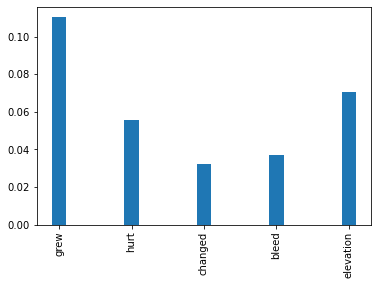

In [66]:
feature_selector = train_feature_selector(X2_adjusted, y2, 5)
scores = feature_scores(feature_selector)

def plot_feature_scores(scores, X_train):
    # Get no. of features
    features = len(scores)

    # Visualize feature scores
    plt.bar(np.arange(0,features), scores, width=.2)
    plt.xticks(np.arange(0,features), list(X_train.columns), rotation='vertical')
    plt.show()

plot_feature_scores(scores, X2_adjusted)

### Conclusion

There are now three different logistic regression models to account for:

1. The original deep data - almost all non-duplicate observations with many variables removed because of many missing values
2. The original wide data - all variables but with all incomplete observations removed, under half size of the original dataset
3. The adjusted wide data - all incomplete observations removed, and five predictor variables

In the context of diagnosis prediction, the recall metric can be pressumed as the most important, as it tells how good the model is at predicting actual positive responses.
A low recall metric then means that many actually positive responses are missed, i.e., in a real world scenerio, many cancerous lesion would be flagged as healthy.
Looking at the recall metric, models 2 and 3 perform best, although not perfect, with scores around 0.85. 
The fact that that model 2 performs relatively good might indicate that having more predictor variables is more important than having more data. 
However, it might also be an effect of having a smaller dataset, which is the case in both models. 

A limitation of the used scikit-learn logistic regression models is the inability to investigate p-values with any build in function, 
as this mean we are not able to conclude what predictors are statistically significant, and cannot accurately improve the model manually by removing insignificant predictor variables. This is why the RFE and RFECV is implemented to select the best features.